# Project 3 - Regression

### Conducting experiments on various data to implement Regression Models, and predict the Y-Intercept target variable

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

## Experiment 1


In [130]:
df = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 3 - Predicting Housing Prices with Linear Regression/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Pre-Processing

### Lets get an idea of the target variable 'SalePrice' which is the price of the property, and some of its characterisitcs

In [131]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### Our first step will be to change our categorical variables into integer data types

In [132]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])

In [133]:
df.dtypes

Id               int64
MSSubClass       int64
MSZoning         int64
LotFrontage      int64
LotArea          int64
                 ...  
MoSold           int64
YrSold           int64
SaleType         int64
SaleCondition    int64
SalePrice        int64
Length: 81, dtype: object

In [27]:
df['SalePrice']


0       458
1       179
2       610
3       431
4       213
       ... 
1455    116
1456    478
1457    384
1458    452
1459    507
Name: SalePrice, Length: 1460, dtype: int64

## Data Understanding

#### The effort of this phase is to get a deeper understanding of relationships amongst the data and any interesting charactersitics/ attributes within that the fields

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

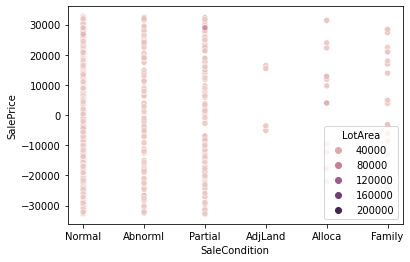

In [10]:
sns.scatterplot(data = df, x= 'SaleCondition', y = 'SalePrice', hue= 'LotArea')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

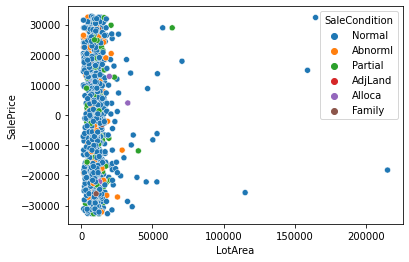

In [8]:
sns.scatterplot(data = df, x= 'LotArea', y = 'SalePrice', hue= 'SaleCondition')

<AxesSubplot:xlabel='SalePrice', ylabel='SaleCondition'>

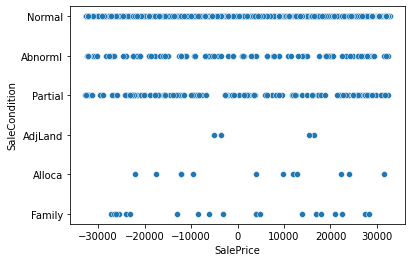

In [11]:
sns.scatterplot(data = df, x= 'SalePrice', y = 'SaleCondition', hue= 'LotArea')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

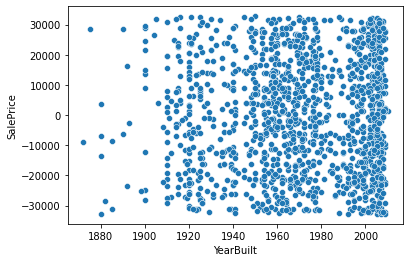

In [12]:
sns.scatterplot(data = df, x= 'YearBuilt', y = 'SalePrice', )#hue= 'LotArea')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

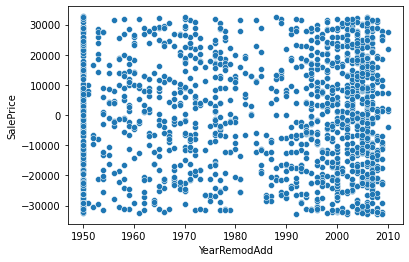

In [13]:
sns.scatterplot(data = df, x= 'YearRemodAdd', y = 'SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

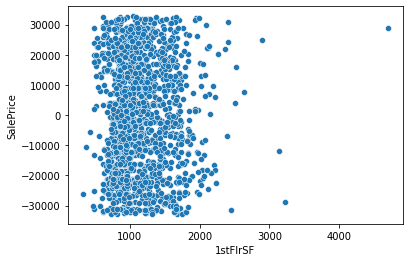

In [14]:
sns.scatterplot(data = df, x= '1stFlrSF', y = 'SalePrice')

<AxesSubplot:>

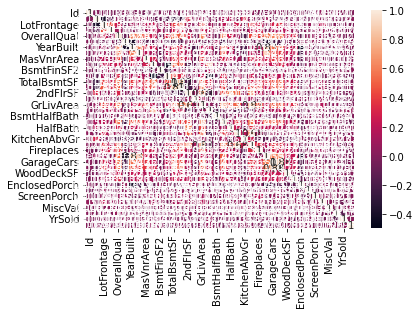

In [12]:
corr = df.corr()
sns.heatmap(corr, annot = True)

## Modeling

Now that we have a better understanding of the model, it seems as if 'LotArea' would be an ideal indicator for 'SalePrice', so we can use this for our linear regression model 

In [134]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [135]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [136]:
print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficients: 
 [-8.73346980e-04  4.17253857e-01 -1.39529038e+01 -2.02560806e-02
  3.60830155e-02  6.43139323e+01  2.33033932e+00 -2.37116014e+00
 -4.68936480e+00 -7.49228836e+01 -1.34934394e+00  9.54342332e+00
 -2.99254944e-01 -1.85597144e+00 -1.76188215e+01 -4.81431888e+00
  5.02091861e-02  2.30083231e+01  1.43985787e+01  8.71432415e-01
  4.24804767e-01 -6.33390261e-01  1.52992478e+00 -1.90758589e+00
  1.69988652e+00  4.47152632e+00  5.13016011e-03 -5.92869503e+00
 -7.11009938e-01  5.57903815e-01 -1.72876362e+00  3.92451085e+00
  1.35573406e-01 -8.34493777e-01  9.19487430e-03  2.20707959e-01
 -1.00013394e-01 -3.74125817e-02  1.56721375e-01 -6.05499089e+00
 -4.06049207e+00 -1.85411194e+00 -2.01461600e+00  3.69979304e-02
  1.23323554e-01 -3.47898416e-01  1.81860586e-01  1.31469271e+01
  5.76568023e+00  1.86244991e+01  5.10036141e+00 -9.82301926e+00
 -5.93057578e+01 -4.98624372e+00  2.39204905e-01  8.30806119e+00
  9.40637873e+00 -1.43604843e+00 -8.60745203e-01 -7.91176838e-02
 -6.56577

In [137]:
y_pred= model.predict(x_test)
mean_squared_error(y_test, y_pred)

3430.9028702535934

In [138]:
x = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(x)
print(rmse)

58.573909467045084


In [139]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [-8.73346980e-04  4.17253857e-01 -1.39529038e+01 -2.02560806e-02
  3.60830155e-02  6.43139323e+01  2.33033932e+00 -2.37116014e+00
 -4.68936480e+00 -7.49228836e+01 -1.34934394e+00  9.54342332e+00
 -2.99254944e-01 -1.85597144e+00 -1.76188215e+01 -4.81431888e+00
  5.02091861e-02  2.30083231e+01  1.43985787e+01  8.71432415e-01
  4.24804767e-01 -6.33390261e-01  1.52992478e+00 -1.90758589e+00
  1.69988652e+00  4.47152632e+00  5.13016011e-03 -5.92869503e+00
 -7.11009938e-01  5.57903815e-01 -1.72876362e+00  3.92451085e+00
  1.35573406e-01 -8.34493777e-01  9.19487430e-03  2.20707959e-01
 -1.00013394e-01 -3.74125817e-02  1.56721375e-01 -6.05499089e+00
 -4.06049207e+00 -1.85411194e+00 -2.01461600e+00  3.69979304e-02
  1.23323554e-01 -3.47898416e-01  1.81860586e-01  1.31469271e+01
  5.76568023e+00  1.86244991e+01  5.10036141e+00 -9.82301926e+00
 -5.93057578e+01 -4.98624372e+00  2.39204905e-01  8.30806119e+00
  9.40637873e+00 -1.43604843e+00 -8.60745203e-01 -7.91176838e-02
 -6.5657785

### Train Accuracy

In [141]:
model.score(x_train,y_train)

0.9215819089696854

### Test Accuracy

In [140]:
model.score(x_test,y_test)

0.8931657166121152

## Experiment 2

#### This next experiment will utilize Cancer Death Rate Data, which is comprised of demographic variables. The effort of this experiment is to be able to anticipate/predict the target variable(cancer death reate) with the associated demographic variables

In [225]:
cancer_df = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 3 - Predicting Housing Prices with Linear Regression/cancer_reg.csv', encoding = "ISO-8859-1")

### Data Pre-Processing

In [46]:
cancer_df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [226]:
cancer_df.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

#### Our first step will be to change our categorical variables into integer data types

In [227]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in cancer_df.columns:
    cancer_df[col] = enc.fit(cancer_df[col]).transform(cancer_df[col])

In [228]:
cancer_df.dtypes

avgAnnCount                int64
avgDeathsPerYear           int64
TARGET_deathRate           int64
incidenceRate              int64
medIncome                  int64
popEst2015                 int64
povertyPercent             int64
studyPerCap                int64
binnedInc                  int64
MedianAge                  int64
MedianAgeMale              int64
MedianAgeFemale            int64
Geography                  int64
AvgHouseholdSize           int64
PercentMarried             int64
PctNoHS18_24               int64
PctHS18_24                 int64
PctSomeCol18_24            int64
PctBachDeg18_24            int64
PctHS25_Over               int64
PctBachDeg25_Over          int64
PctEmployed16_Over         int64
PctUnemployed16_Over       int64
PctPrivateCoverage         int64
PctPrivateCoverageAlone    int64
PctEmpPrivCoverage         int64
PctPublicCoverage          int64
PctPublicCoverageAlone     int64
PctWhite                   int64
PctBlack                   int64
PctAsian  

### Data Understanding

### All variable aside from the Target variable will be utilized to predict the target variable

In [57]:
cancer_df['TARGET_deathRate'].dtype

dtype('int64')

### Modeling for Cancer Death Rate

In [58]:
cancer_x = cancer_df.drop('TARGET_deathRate', axis=1)
cancer_y = cancer_df['TARGET_deathRate']

cancer_x_train, cancer_x_test,cancer_y_train, cancer_y_test = train_test_split(cancer_x, cancer_y, test_size=0.2)

In [63]:
cancer_model = linear_model.LinearRegression()
cancer_model.fit(cancer_x_train, cancer_y_train)


LinearRegression()

In [64]:
cancer_y_pred= model.predict(cancer_x_test)
mean_squared_error(cancer_y_test, cancer_y_pred)

29288.665984663538

In [65]:
cancer_x = mean_squared_error(cancer_y_test, cancer_y_pred)
cancer_rmse = np.sqrt(cancer_x)
print(cancer_rmse)

171.1393174716539


### Model Performance and Results


In [66]:
print('Coefficients:', cancer_model.coef_)
print('Intercept:', cancer_model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(cancer_y_test, cancer_y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(cancer_y_test, cancer_y_pred))

Coefficients: [-5.84554898e-02  1.54759880e-01  2.34788135e-01 -6.03099175e-02
 -1.51069481e-03 -3.57243548e-01 -1.15992708e-02  3.33866505e+00
 -2.10417124e-01 -1.39524488e-02 -3.31472677e-01  3.59287915e-03
 -4.19284139e-01  3.92511881e-01 -7.12553569e-02  2.50973797e-01
  1.89571511e-02 -2.21385128e-01  5.04037150e-01 -6.89142428e-01
 -9.33301169e-02  3.78284802e-01 -5.18006225e-01  1.46009733e-02
  2.15437264e-01 -2.62599382e-02 -1.92518185e-01 -3.97354251e-04
  3.65332330e-02 -5.42476481e-03 -2.15783200e-02 -3.38462728e-02
 -1.09373919e-02]
Intercept: 583.4678083808534
Mean squared error (MSE): 29288.67
Coefficient of determination (R^2): 0.50


### Train Accuracy

In [126]:

cancer_model.score(cancer_x_train,cancer_y_train)



0.5208332564342327

### Test Accuracy

In [127]:
cancer_model.score(cancer_x_test,cancer_y_test)

0.5023350336256762

## Experiment 3

### Data Pre-Processing

#### This next experiment will utilize Life Expectancy data from the WHO(World Health Organization), which is comprised of demographic variables. The effort of this experiment is to be able to anticipate/predict the target variable(Life Expectancy) within all countries with one other specific variable

In [209]:
who_df = pd.read_csv('/Users/joshuahernandez8/Desktop/ITCS 3162/Project 3 - Predicting Housing Prices with Linear Regression/Life Expectancy Data.csv')

In [210]:
who_df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [179]:
who_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [211]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in who_df.columns:
    who_df[col] = enc.fit(who_df[col]).transform(who_df[col])

In [212]:
who_df.dtypes

Country                            int64
Year                               int64
Status                             int64
Life expectancy                    int64
Adult Mortality                    int64
infant deaths                      int64
Alcohol                            int64
percentage expenditure             int64
Hepatitis B                        int64
Measles                            int64
 BMI                               int64
under-five deaths                  int64
Polio                              int64
Total expenditure                  int64
Diphtheria                         int64
 HIV/AIDS                          int64
GDP                                int64
Population                         int64
 thinness  1-19 years              int64
 thinness 5-9 years                int64
Income composition of resources    int64
Schooling                          int64
dtype: object

### Data Understanding

##### Now that we can see our data, we can start looking to compare variables and their propensity with lower life expectancy

In [121]:
who_df[[' BMI ']]

,BMI
0,19.1
1,18.6
2,18.1
3,17.6
4,17.2
...,...
2933,27.1
2934,26.7
2935,26.3
2936,25.9


In [99]:
who_df[['Life expectancy ']]

,Life expectancy
0,187
1,145
2,145
3,141
4,138
...,...
2933,10
2934,11
2935,13
2936,15


<AxesSubplot:xlabel='Hepatitis B', ylabel='Life expectancy '>

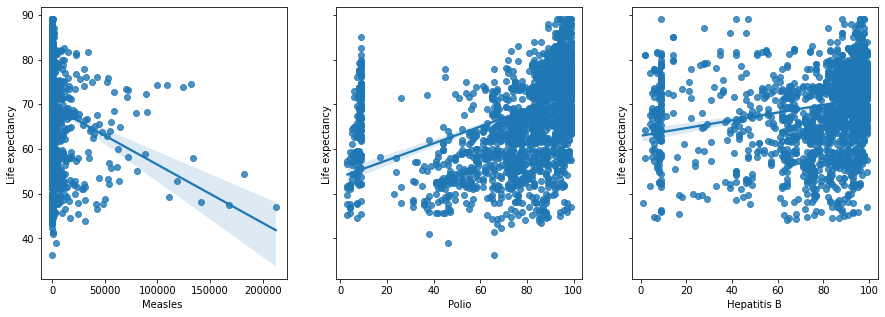

In [144]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=who_df['Measles '], y=who_df['Life expectancy '], ax=ax1)
sns.regplot(x=who_df['Polio'], y=who_df['Life expectancy '], ax=ax2)
sns.regplot(x=who_df['Hepatitis B'], y=who_df['Life expectancy '], ax=ax3)              

<AxesSubplot:xlabel='Alcohol', ylabel='Life expectancy '>

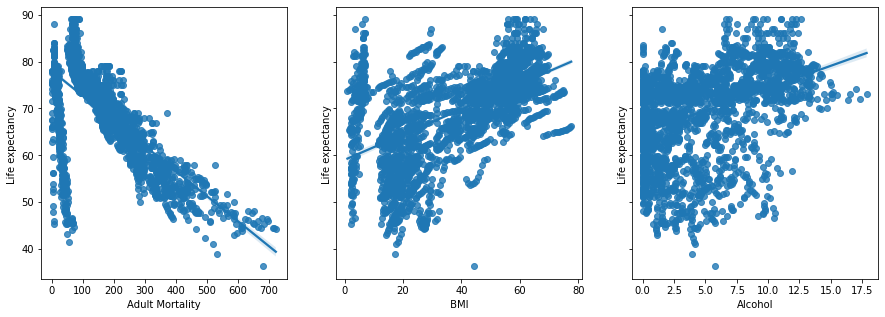

In [119]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=who_df['Adult Mortality'], y=who_df['Life expectancy '], ax=ax1)
sns.regplot(x=who_df[' BMI '], y=who_df['Life expectancy '], ax=ax2)
sns.regplot(x=who_df['Alcohol'], y=who_df['Life expectancy '], ax=ax3)

<AxesSubplot:xlabel='Population', ylabel='Life expectancy '>

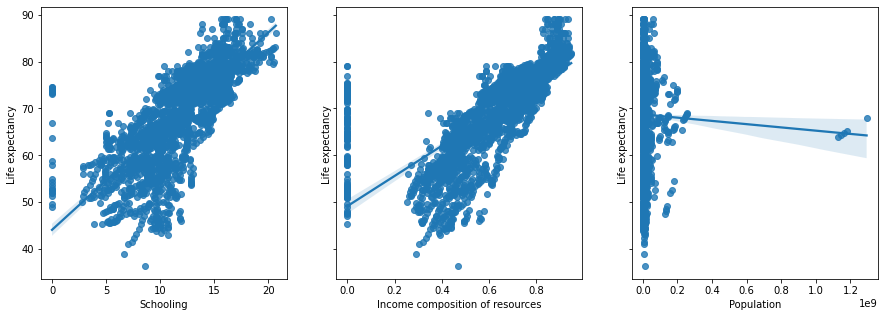

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=who_df['Schooling'], y=who_df['Life expectancy '], ax=ax1)
sns.regplot(x=who_df['Income composition of resources'], y=who_df['Life expectancy '], ax=ax2)
sns.regplot(x=who_df['Population'], y=who_df['Life expectancy '], ax=ax3)

<AxesSubplot:>

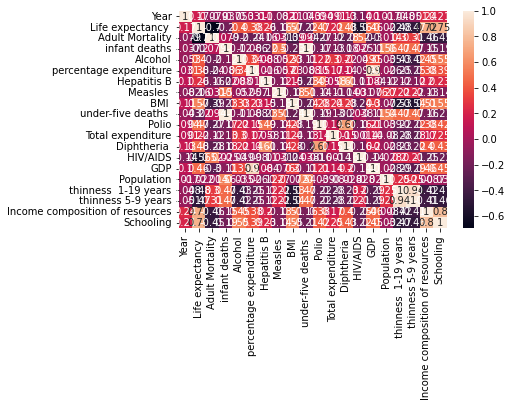

In [116]:
corr = who_df.corr()
sns.heatmap(corr, annot = True)

### Modeling

#### Now that we can see that 'Adult Morality', 'Schooling', and 'Income composition of resources' show strong linear relationships with 'Life expectancy' we will use these variables to build our model.

#### We will build this model, only using 'Income composition of resources' as the only feature. This is an interesting features because means that if a country utilizes its resources productively, it could possibly see its citizens have a longer life expectancy. The ICOR value is graded from 0 to 1. The top ranked countries have ICOR values ranging from 0.92 to 0.95 and their citizens all have life expectancy of 80 years or more.



In [213]:
who_x = who_df[['Income composition of resources']]
who_y = who_df['Life expectancy ']

who_x_train, who_x_test,who_y_train, who_y_test = train_test_split(who_x, who_y, test_size=0.2)

In [214]:
who_model = linear_model.LinearRegression()
who_model.fit(who_x_train, who_y_train)


LinearRegression()

In [215]:
who_y_pred= who_model.predict(who_x_test)
mean_squared_error(who_y_test, who_y_pred)

3474.437568514217

In [216]:
who_x = mean_squared_error(who_y_test, who_y_pred)
who_rmse = np.sqrt(who_x)
print(who_rmse)

58.944359938116364


### Model Performance and Results


In [217]:
print('Coefficients:', who_model.coef_)
print('Intercept:', who_model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(who_y_test, who_y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(who_y_test, who_y_pred))

Coefficients: [0.33736384]
Intercept: 109.46020087006937
Mean squared error (MSE): 3474.44
Coefficient of determination (R^2): 0.54


#### Train Accuracy

In [218]:
who_model.score(who_x_train, who_y_train)

0.5015857760124833

#### Test Accuracy

In [219]:
who_model.score(who_x_test, who_y_test)

0.5433541036515318